In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
X = np.random.rand(100,8)
y = np.random.rand(100,1)

In [13]:
df = pd.DataFrame({'feature1':X[:, 0], 'feature2':X[:, 1], 'feature3':X[:, 2],
                   'feature4':X[:, 3], 'feature5':X[:, 4], 'feature6':X[:, 5],
                   'feature7':X[:, 6], 'feature8':X[:, 7]})
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176
1,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405
2,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362
3,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524
4,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
dtypes: float64(8)
memory usage: 6.4 KB


In [5]:
#no need normalization or standarization
df.describe()

,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.473188,0.521632,0.435645,0.538168,0.481744,0.494702,0.499147,0.531426
std,0.308973,0.281286,0.287705,0.299888,0.301425,0.292254,0.297254,0.275084
min,0.005062,0.023272,0.018110,0.014545,0.014393,0.009197,0.012154,0.010838
25%,0.192313,0.272134,0.169232,0.288886,0.214339,0.242270,0.202823,0.314451
50%,0.487497,0.524634,0.413904,0.564591,0.499613,0.534779,0.500192,0.521156
75%,0.743677,0.753972,0.646846,0.795371,0.753157,0.728764,0.756410,0.790265
max,0.963620,0.989960,0.985650,0.999718,0.996637,0.990054,0.990505,0.969879


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

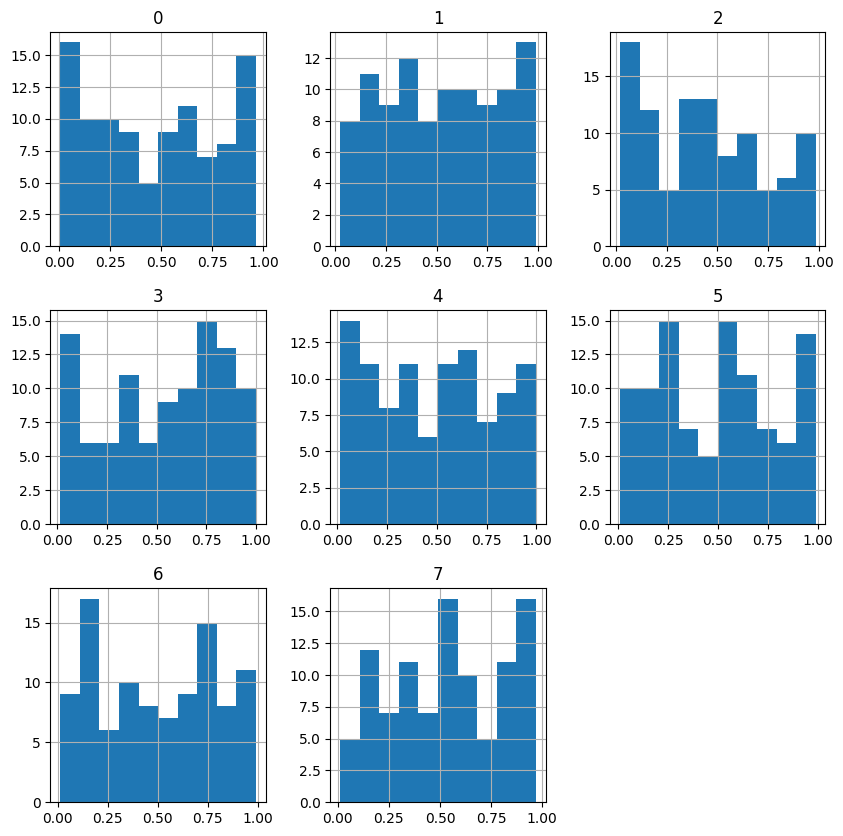

In [6]:
df.hist(figsize=(10,10))

In [7]:
# #classic split 80% - 20% without framework
# X_train = X[:80]
# X_test = X[80:]
# y_train = y[:80]
# y_test = y[80:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
class Linier_Regression():
  def __init__(self, X) :
    self.num_feature = X.shape[1]
    self.weight = np.random.rand(self.num_feature, 1)
    self.bias = np.random.randn(1)
    self.X = X

  def predict(self):
    h = np.dot(self.X, self.weight) + self.bias
    return h

In [10]:
#define our model
model = Linier_Regression(X_train)

In [11]:
#hyperparameter
learning_rate = 0.01
num_epoch = 100
loss_tolerance = 0.0001
loss_history = []

#training
for i in range(num_epoch):
  y_pred = model.predict()

  #calculate loss using MSE
  loss = 1/(2*len(X_train)) * np.sum((y_pred - y_train)**2)
  loss_history.append(loss)

  #calculate gradient
  dw = 1/(len(X_train)) * np.dot(X_train.T, (y_pred - y_train))
  db = 1/(len(X_train)) * np.sum(y_pred - y_train)

  #update weight and bias
  model.weight -= learning_rate*dw
  model.bias -= learning_rate*db

  if loss < loss_tolerance:
    break

  print(f"Epoch {i+1}: Loss = {loss}")

Epoch 1: Loss = 0.34109703075638864
Epoch 2: Loss = 0.3270968835278119
Epoch 3: Loss = 0.31394981639141095
Epoch 4: Loss = 0.30160356758992146
Epoch 5: Loss = 0.2900090773976811
Epoch 6: Loss = 0.2791202919344845
Epoch 7: Loss = 0.2688939789996222
Epoch 8: Loss = 0.2592895551896346
Epoch 9: Loss = 0.25026892360843606
Epoch 10: Loss = 0.24179632152082103
Epoch 11: Loss = 0.23383817734013182
Epoch 12: Loss = 0.22636297637818573
Epoch 13: Loss = 0.21934113482060882
Epoch 14: Loss = 0.21274488142360903
Epoch 15: Loss = 0.2065481464591022
Epoch 16: Loss = 0.20072645746408987
Epoch 17: Loss = 0.19525684137739754
Epoch 18: Loss = 0.19011773267242366
Epoch 19: Loss = 0.18528888711852845
Epoch 20: Loss = 0.18075130082620086
Epoch 21: Loss = 0.17648713425226817
Epoch 22: Loss = 0.17247964086125234
Epoch 23: Loss = 0.16871310015759314
Epoch 24: Loss = 0.16517275482093846
Epoch 25: Loss = 0.16184475169310927
Epoch 26: Loss = 0.15871608638075163
Epoch 27: Loss = 0.155774551252143
Epoch 28: Loss = 0

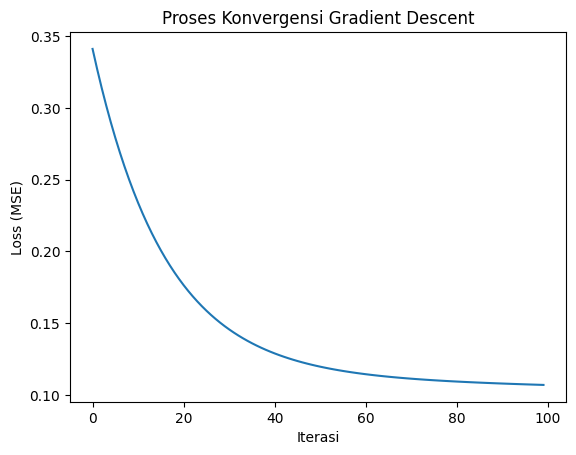

In [12]:
sns.lineplot(x=range(len(loss_history)), y=loss_history)
plt.xlabel('Iterasi')
plt.ylabel('Loss (MSE)')
plt.title('Proses Konvergensi Gradient Descent')
plt.show()